In [23]:
import pandas as pd


In [24]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0



**Algoritmos de clasificación**

Arbol de decision

In [100]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [26]:
df=df.dropna()

In [27]:
df.shape

(2011, 10)

In [ ]:
df.groupby('Potability').size()

Potability
0    1200
1     811
dtype: int64

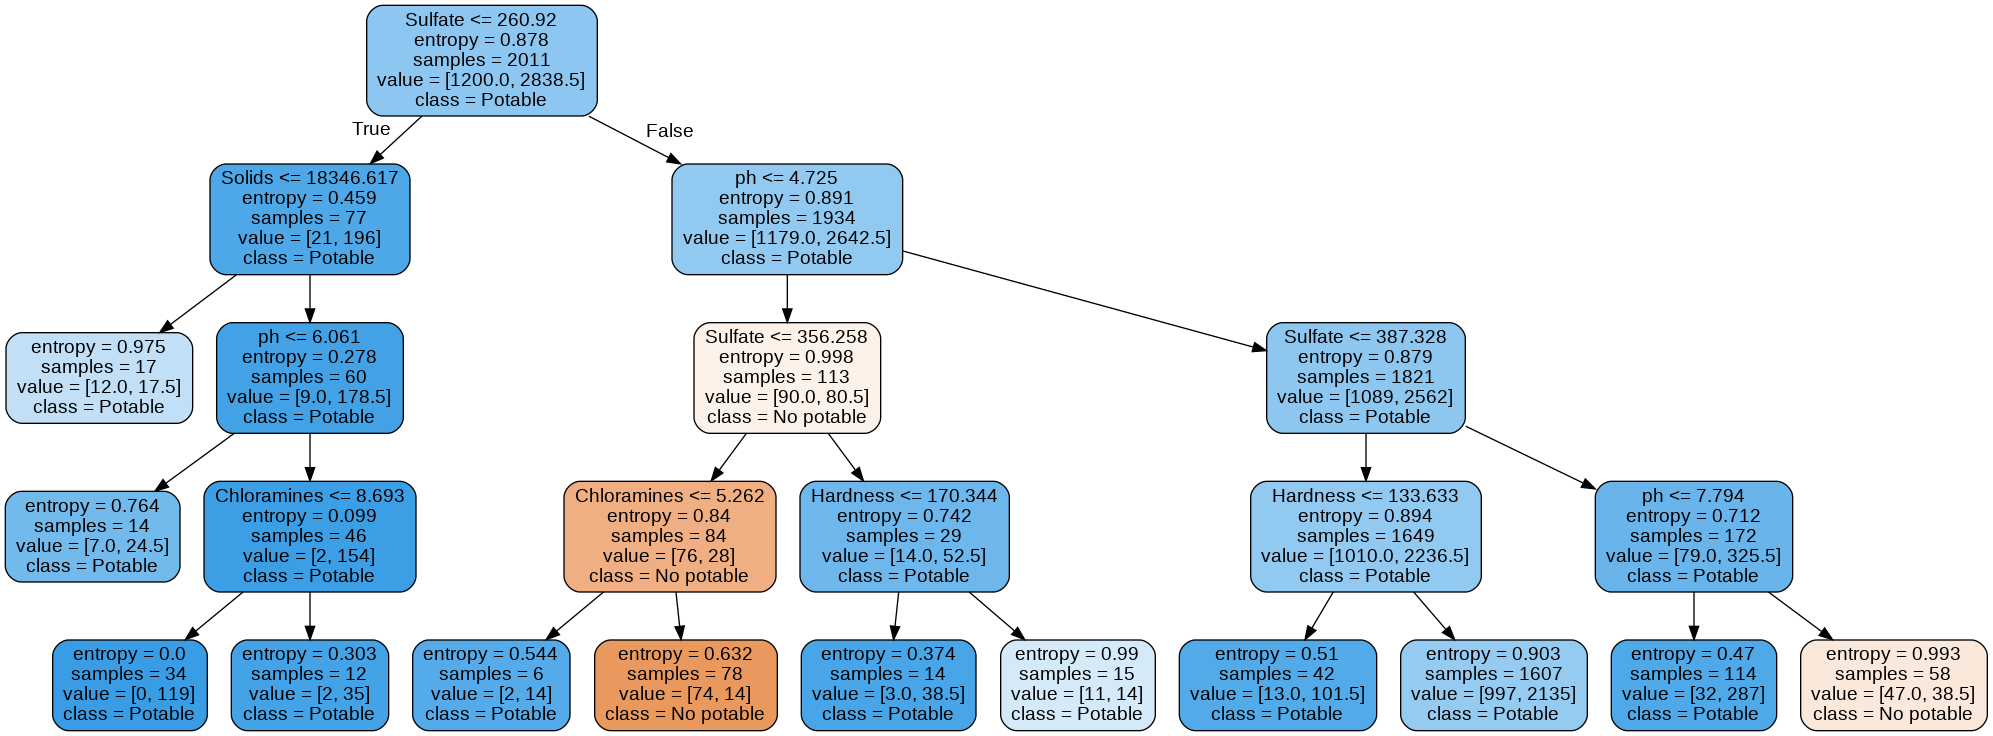

In [ ]:

y_train = df['Potability']
x_train = df.drop(['Potability'], axis=1).values 


decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(df.drop(['Potability'], axis=1)),
                              class_names = ['No', 'N1 Billboard'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = df['Potability']
x_train = df.drop(['Potability'], axis=1).values 
 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)
 
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(df.drop(['Potability'], axis=1)),
                              class_names = ['Potable', 'No Potable'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

Algoritmo K means


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8d6e59c90>,
      dtype=object)

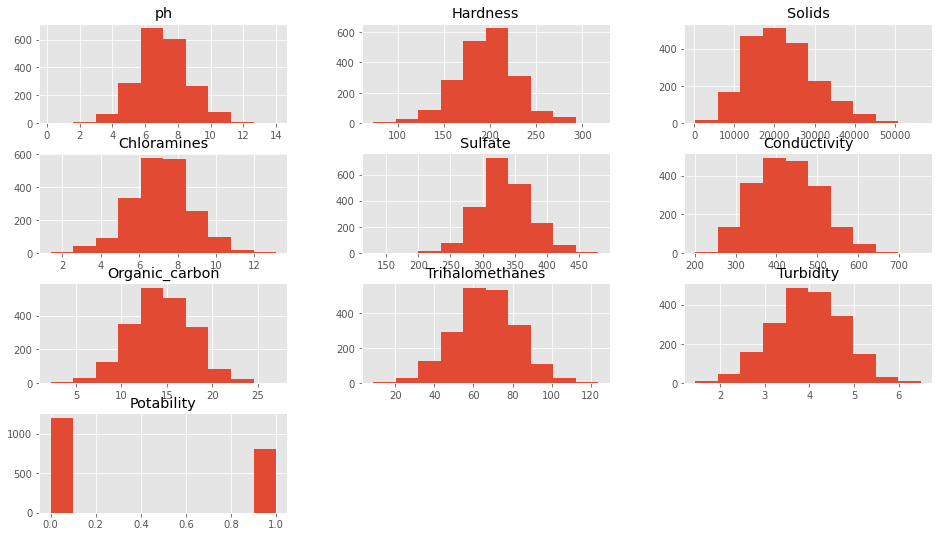

In [28]:
df.hist()

In [80]:
df1=df.iloc[:,0:9]
df1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


Normalizamos los datos


In [81]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [82]:
scaler = MinMaxScaler()

In [83]:
scale =scaler.fit_transform(df1)


In [84]:
df_scale = pd.DataFrame(scale, columns = df1.columns)
df_scale

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.587349,0.577747,0.386298,0.568199,0.647347,0.292985,0.654522,0.795029,0.630115
1,0.643654,0.441300,0.314381,0.439304,0.514545,0.356685,0.377248,0.202914,0.520358
2,0.388934,0.470876,0.506122,0.524364,0.561537,0.142913,0.249922,0.401487,0.219973
3,0.725820,0.715942,0.506141,0.521683,0.751819,0.148683,0.467200,0.658678,0.242428
4,0.610517,0.532588,0.237701,0.270288,0.495155,0.494792,0.409721,0.469762,0.585049
...,...,...,...,...,...,...,...,...,...
2006,0.636224,0.580511,0.277748,0.418063,0.522486,0.342184,0.310364,0.402799,0.627156
2007,0.470143,0.548826,0.301347,0.538273,0.498565,0.231359,0.565061,0.175889,0.395061
2008,0.817826,0.087434,0.656389,0.670774,0.369089,0.431872,0.563265,0.285745,0.578674
2009,0.424187,0.464092,0.459656,0.541633,0.615572,0.388360,0.397780,0.449156,0.440004


Aplicamos PCA

In [85]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [86]:
pca=PCA()

In [87]:
pca.fit(df_scale)

PCA()

In [88]:
pca.explained_variance_

array([0.02528348, 0.02379758, 0.02162396, 0.01959385, 0.01880263,
       0.01815766, 0.01749259, 0.01250247, 0.01201338])

In [89]:
pca.explained_variance_ratio_

array([0.14936986, 0.14059146, 0.12775016, 0.11575666, 0.11108227,
       0.10727191, 0.1033428 , 0.07386218, 0.07097271])

In [90]:
components = np.arange(pca.n_components_) + 1
variance = pca.explained_variance_ratio_

In [91]:
pca_summary_df = pd.DataFrame({"Proporción de la varianza": pca.explained_variance_ratio_, "Propoción acumulada":np.cumsum(pca.explained_variance_ratio_)})
pca_summary_df

,Proporción de la varianza,Propoción acumulada
0,0.149370,0.149370
1,0.140591,0.289961
2,0.127750,0.417711
3,0.115757,0.533468
4,0.111082,0.644550
5,0.107272,0.751822
6,0.103343,0.855165
7,0.073862,0.929027
8,0.070973,1.000000


In [92]:
pca_summary_df = pca_summary_df.transpose()
pca_summary_df

,0,1,2,3,4,5,6,7,8
Proporción de la varianza,0.14937,0.140591,0.127750,0.115757,0.111082,0.107272,0.103343,0.073862,0.070973
Propoción acumulada,0.14937,0.289961,0.417711,0.533468,0.644550,0.751822,0.855165,0.929027,1.000000


In [93]:
pca_summary_df.columns = ["PC" + str(pc) for pc in range(1, len(pca_summary_df.columns) + 1)]
pca_summary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Proporción de la varianza,0.14937,0.140591,0.127750,0.115757,0.111082,0.107272,0.103343,0.073862,0.070973
Propoción acumulada,0.14937,0.289961,0.417711,0.533468,0.644550,0.751822,0.855165,0.929027,1.000000


In [94]:
pca_components_df = pd.DataFrame(pca.components_.transpose(),
                                columns=components,
                                index=df1.columns)

In [51]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [95]:
pca_components_df

,1,2,3,4,5,6,7,8,9
ph,-0.151105,-0.003029,0.069967,0.070351,-0.217459,0.014298,0.020618,0.814584,0.505815
Hardness,-0.150935,0.060407,0.149259,0.313048,-0.712706,0.393207,0.189708,-0.025860,-0.392521
Solids,0.820204,0.468916,0.003976,-0.035016,-0.013755,0.037502,0.130301,0.248609,-0.160502
Chloramines,-0.093292,-0.133395,-0.201294,-0.272505,0.304981,0.477107,0.728872,0.082274,-0.007500
Sulfate,-0.195227,-0.130843,-0.062492,-0.001477,0.260509,-0.223300,-0.094577,0.507801,-0.745872
Conductivity,0.013253,-0.065668,0.956371,-0.118215,0.227689,0.112625,0.039741,0.005184,-0.027547
Organic_carbon,-0.051445,0.036252,0.115420,0.170871,-0.129611,-0.724653,0.634736,-0.089158,0.027590
Trihalomethanes,-0.073357,0.046503,0.014649,-0.882159,-0.422935,-0.163900,-0.043472,0.002263,-0.080033
Turbidity,0.476058,-0.856596,-0.014289,0.013725,-0.190207,-0.040183,0.007032,0.036963,-0.003298


Podemos ver que la variable Solids y Turbidity son las más significativas

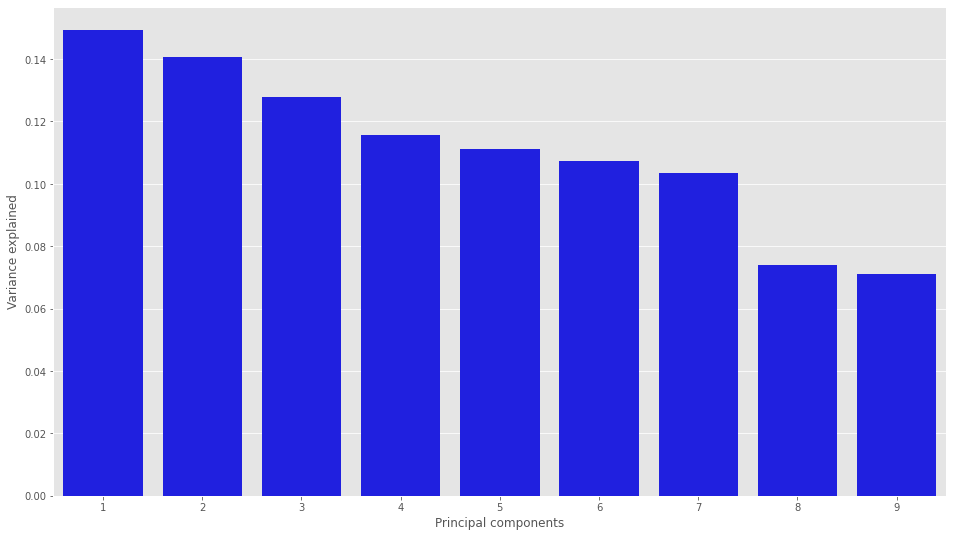

In [96]:
import seaborn as sns
sns.barplot(x=components, y=variance, color="b")
plt.xlabel("Principal components")
plt.ylabel("Variance explained")
plt.show()

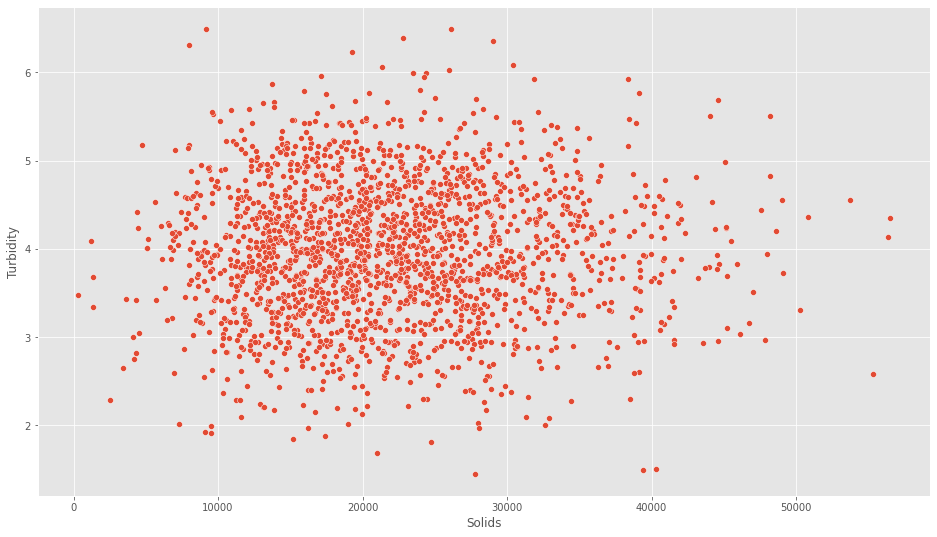

In [97]:
sns.scatterplot(x='Solids', y='Turbidity', data=df)

Nuevo dataframe con las variables Solids  Turbidity

In [98]:
df2=df.iloc[:, [2,8]]
df2

,Solids,Turbidity
3,22018.417441,4.628771
4,17978.986339,4.075075
5,28748.687739,2.559708
6,28749.716544,2.672989
7,13672.091764,4.401425
...,...,...
3267,15921.412018,4.613843
3268,17246.920347,3.442983
3269,37188.826022,4.369264
3270,26138.780191,3.669712


elbw method

In [101]:
K =range (2,10)
inertias =[]
for i in K:
  kmeans =KMeans(n_clusters=i)
  kmeans.fit(df2)
  inertias. append(kmeans.inertia_)

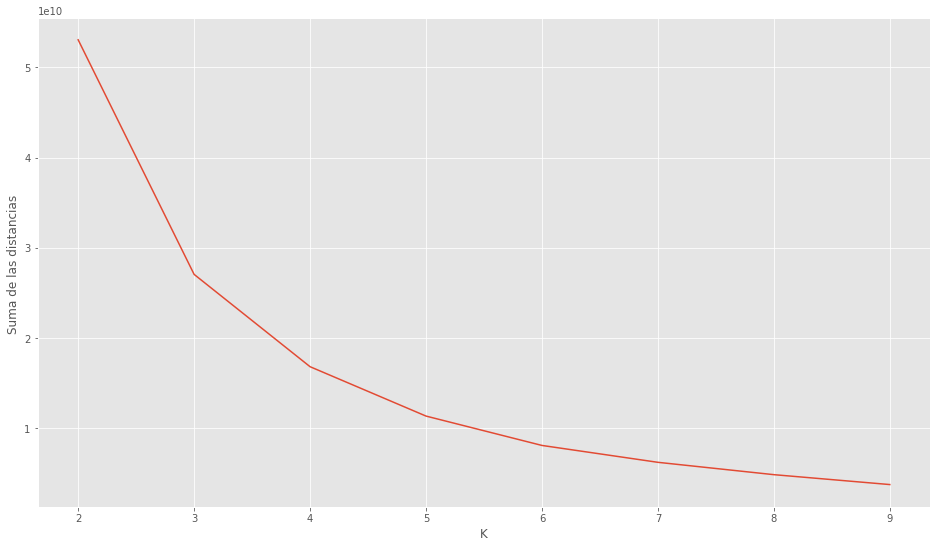

In [102]:
plt.plot(K, inertias)
plt.xlabel ("K")
plt.ylabel("Suma de las distancias ")
plt.show()

In [110]:
km = KMeans(n_clusters=3)

In [104]:
km.fit_predict(df2)

array([1, 2, 1, ..., 0, 1, 0], dtype=int32)

In [105]:
km.cluster_centers_

array([[3.60129026e+04, 3.99147007e+00],
       [2.37851152e+04, 3.97802759e+00],
       [1.38380032e+04, 3.95135316e+00]])

In [106]:
df2["Clusters"] = km.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


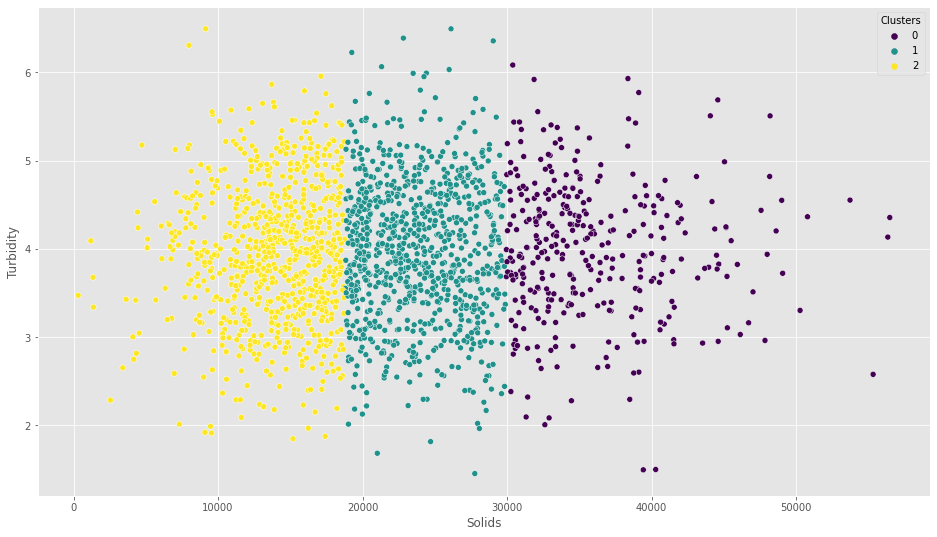

In [109]:
sns.scatterplot(x='Solids', y='Turbidity',hue='Clusters',data=df2, palette="viridis")

In [111]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [112]:
linkage_data = linkage(df2, method='centroid', metric='euclidean')

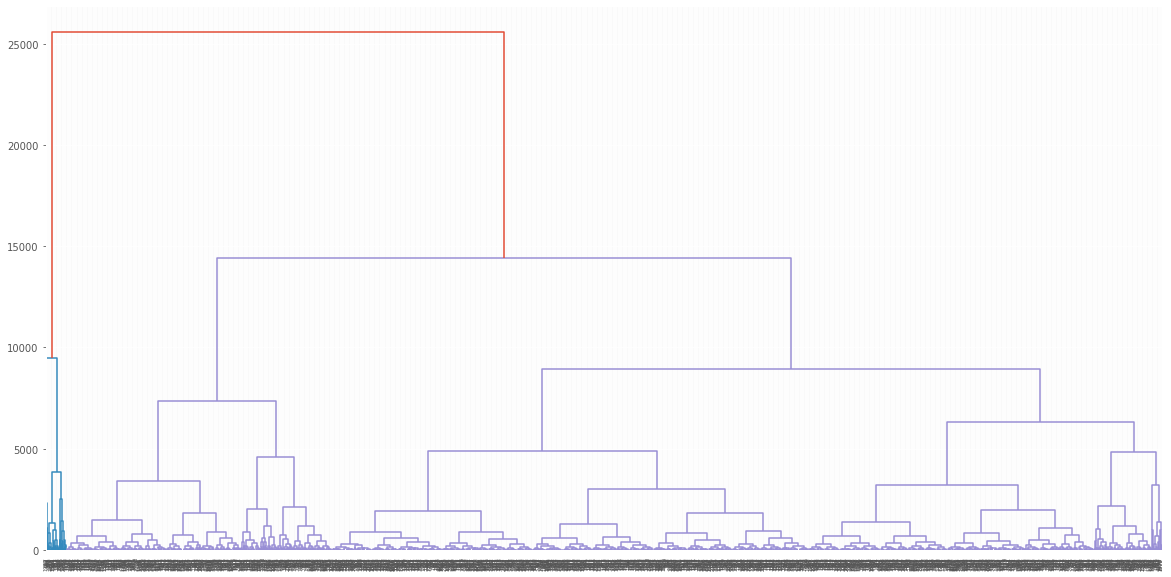

In [113]:
plt.figure(figsize=(20,10))
dendrogram(linkage_data)
plt.show()

Podemos ver que para estos datos es la mejor opción el arbol de decision ya que este nos da valores correcto incluidos las variables categoricas dandonos una precision mayor que K means
